# Stock Dynamics
Call the data frames "IBM", "GE", "ProcterGamble", "CocaCola", and "Boeing", respectively. Each data frame has two variables, described as follows:
- Date: the date of the stock price, always given as the first of the month.
- StockPrice: the average stock price of the company in the given month.

In this problem, we'll take a look at how the stock dynamics of these companies have changed over time.

## Problem 1.1 - Summary Statistics
Before working with these data sets, we need to convert the dates into a format that Python can understand.

Our five datasets all have the same number of observations. How many observations are there in each data set?

In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


ibm = pd.read_csv('../data/IBMStock.csv')
ge = pd.read_csv('../data/GEStock.csv')
procter_gamble = pd.read_csv('../data/ProcterGambleStock.csv')
coca_cola = pd.read_csv('../data/CocaColaStock.csv')
boeing = pd.read_csv('../data/BoeingStock.csv')

stocks = [ibm, ge, procter_gamble, coca_cola, boeing]
for df in stocks:
    df['Date'] = pd.to_datetime(df['Date'], format='%m/%d/%y')

ibm.shape[0]

480

## Problem 1.2 - Summary Statistics
What is the earliest year in our datasets?

In [16]:
ibm['Date'].dt.year.min()

1970

## Problem 1.3 - Summary Statistics
What is the latest year in our datasets?

In [17]:
ibm['Date'].dt.year.max()

2009

## Problem 1.4 - Summary Statistics
What is the mean stock price of IBM over this time period?

In [18]:
ibm['StockPrice'].mean()

144.37503030766666

## Problem 1.5 - Summary Statistics
What is the minimum stock price of General Electric (GE) over this time period?

In [19]:
ge['StockPrice'].min()

9.293636364

## Problem 1.6 - Summary Statistics
What is the maximum stock price of Coca-Cola over this time period?

In [20]:
coca_cola['StockPrice'].max()

146.5842857

## Problem 1.7 - Summary Statistics
What is the median stock price of Boeing over this time period?

In [21]:
boeing['StockPrice'].median()

44.88339827

## Problem 1.8 - Summary Statistics
What is the standard deviation of the stock price of Procter & Gamble over this time period?

In [22]:
procter_gamble['StockPrice'].std()

18.19414030797156

## Problem 2.1 - Visualizing Stock Dynamics
Let's plot the stock prices to see if we can visualize trends in stock prices during this time period. Plot a lineplot with the Date on the x-axis and the StockPrice on the y-axis, for Coca-Cola.

Around what year did Coca-Cola has its highest stock price in this time period?
- 1973

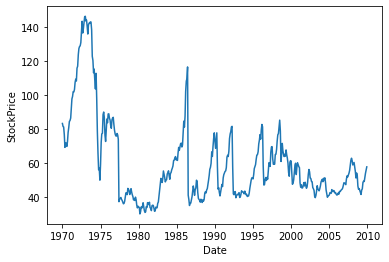

In [23]:
sns.lineplot(data=coca_cola, x='Date', y='StockPrice');

Around what year did Coca-Cola has its lowest stock price in this time period?
- 1980

## Problem 2.2 - Visualizing Stock Dynamics
Now, let's add the line for Procter & Gamble too.

Using this plot, answer the following questions.

In March of 2000, the technology bubble burst, and a stock market crash occurred. According to this plot, which company's stock dropped more?
- Procter & Gamble

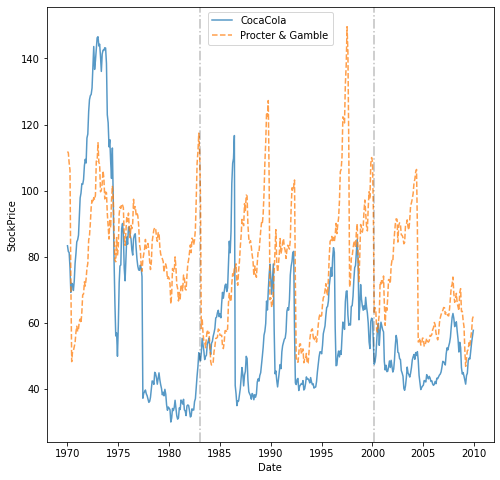

In [24]:
fig, ax = plt.subplots(figsize=[8,8])

sns.lineplot(
    data=coca_cola, x='Date', y='StockPrice', 
    alpha=0.75, label='CocaCola', ax=ax
)
sns.lineplot(
    data=procter_gamble, x='Date', y='StockPrice',
    alpha=0.75, ls='--', label='Procter & Gamble', ax=ax
)
plt.axvline(
    x=pd.to_datetime('20000301'), 
    ls='-.', c='k', alpha=0.25
)
plt.axvline(
    x=pd.to_datetime('19830101'), 
    ls='-.', c='k', alpha=0.25
);

## Problem 2.3 - Visualizing Stock Dynamics
Answer these questions using the plot you generated in the previous problem.

Around 1983, the stock for one of these companies (Coca-Cola or Procter and Gamble) was going up, while the other was going down. Which one was going up?
- CocaCola

In the time period shown in the plot, which stock generally has lower values?
- CocaCola

## Problem 3.1 - Visualizing Stock Dynamics 1995-2005
Let's take a look at how the stock prices changed from 1995-2005 for all five companies.

Use this plot to answer the following four questions.

Which stock fell the most right after the technology bubble burst in March 2000?
- GE

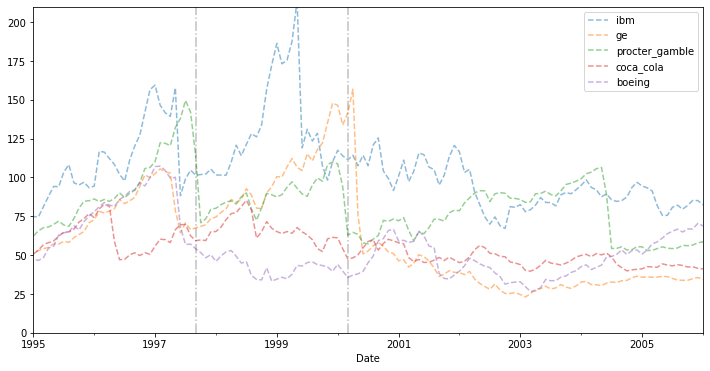

In [25]:
df = pd.DataFrame(index=ibm['Date'])
stock_names = ['ibm', 'ge', 'procter_gamble', 'coca_cola', 'boeing']

for name, stock in zip(stock_names, stocks):
    stock.set_index('Date', inplace=True)
    df[name] = stock['StockPrice']

df.plot.line(alpha=0.5, ls='--', figsize=[12,6])
plt.xlim('1995', '2006')
plt.ylim(0, 210)
plt.axvline(x='1997/09', c='k', ls='-.', alpha=0.25)
plt.axvline(x='2000/03', c='k', ls='-.', alpha=0.25);

## Problem 3.2 - Visualizing Stock Dynamics 1995-2005
Which stock reaches the highest value in the time period 1995-2005?
- IBM

## Problem 3.3 - Visualizing Stock Dynamics 1995-2005
In October of 1997, there was a global stock market crash that was caused by an economic crisis in Asia. Comparing September 1997 to November 1997, which companies saw a decreasing trend in their stock price?
- Procter and Gamble
- Boeing

## Problem 3.4 - Visualizing Stock Dynamics 1995-2005
In the last two years of this time period (2004 and 2005) which stock seems to be performing the best, in terms of increasing stock price?
- Boeing

## Problem 4.1 - Monthly Trends
Lastly, let's see if stocks tend to be higher or lower during certain months.

For IBM, compare the monthly averages to the overall average stock price. In which months has IBM historically had a higher stock price (on average)?
- January
- February
- March
- April
- May

In [26]:
df['Month'] = df.index.month_name()
print(df['ibm'].mean())
print('*'*50)
print(df.groupby('Month')['ibm'].mean().sort_values(ascending=False))

144.37503030766666
**************************************************
Month
February     152.693993
March        152.432690
April        152.116824
May          151.502194
January      150.238423
December     140.759310
August       140.145475
June         139.090676
September    139.088527
July         139.067018
November     138.018682
October      137.346553
Name: ibm, dtype: float64


## Problem 4.2 - Monthly Trends
General Electric and Coca-Cola both have their highest average stock price in the same month. Which month is this?
-April

In [27]:
df.groupby('Month')[['ge', 'coca_cola']].mean().sort_values(by='ge', ascending=False)

,ge,coca_cola
Month,,
April,64.480092,62.688882
March,63.150548,62.071354
February,62.520805,60.734754
January,62.045106,60.368487
May,60.871351,61.443581
December,59.102174,59.732227
November,57.288795,59.102683
July,56.733493,58.983460
August,56.503149,58.880139


## Problem 4.3 - Monthly Trends
For the months of December and January, every company's average stock is higher in one month and lower in the other. In which month are the stock prices lower?
- December

In [28]:
print('Month: December')
print(df[(df['Month']=='December')][stock_names].mean())
print()
print('Month: January')
print(df[(df['Month']=='January')][stock_names].mean())

Month: December
ibm               140.759310
ge                 59.102174
procter_gamble     78.296608
coca_cola          59.732227
boeing             46.173146
dtype: float64

Month: January
ibm               150.238423
ge                 62.045106
procter_gamble     79.617984
coca_cola          60.368487
boeing             46.510974
dtype: float64
